# Imports

In [1]:
# import numpy, matplotlib, etc.
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# define plt settings
plt.rcParams["font.size"] = 15
plt.rcParams["axes.labelsize"] = 15
plt.rcParams["xtick.labelsize"] = 15
plt.rcParams["ytick.labelsize"] = 15
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["figure.figsize"] = (20,10)
%matplotlib inline

# sklearn imports
from sklearn import metrics
from sklearn import pipeline
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import neural_network
from sklearn import model_selection
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import LeavePOut
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import uniform

# download csv file from Github 

#!wget https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/whitewines.csv

import requests

url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/whitewines.csv"
response = requests.get(url)
with open("whitewines.csv", "w") as f:
    f.write(response.text)

In [2]:
data_df = pd.read_csv("whitewines.csv")

# visual reports
from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()
dft = AV.AutoViz("", depVar='quality', dfte=data_df, verbose=1)

 Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
       verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.

import sweetviz as sv
analyze_report = sv.analyze(data_df)
analyze_report.show_html()

In [3]:
data_df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [4]:
data_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


### Many duplicates found..
duplicated_rows = data_df[data_df.duplicated()]
duplicated_indices = data_df.where(data_df.duplicated()).dropna().index
print(duplicated_indices)

#data_df = data_df.drop_duplicates(keep='last')

# Explore Data

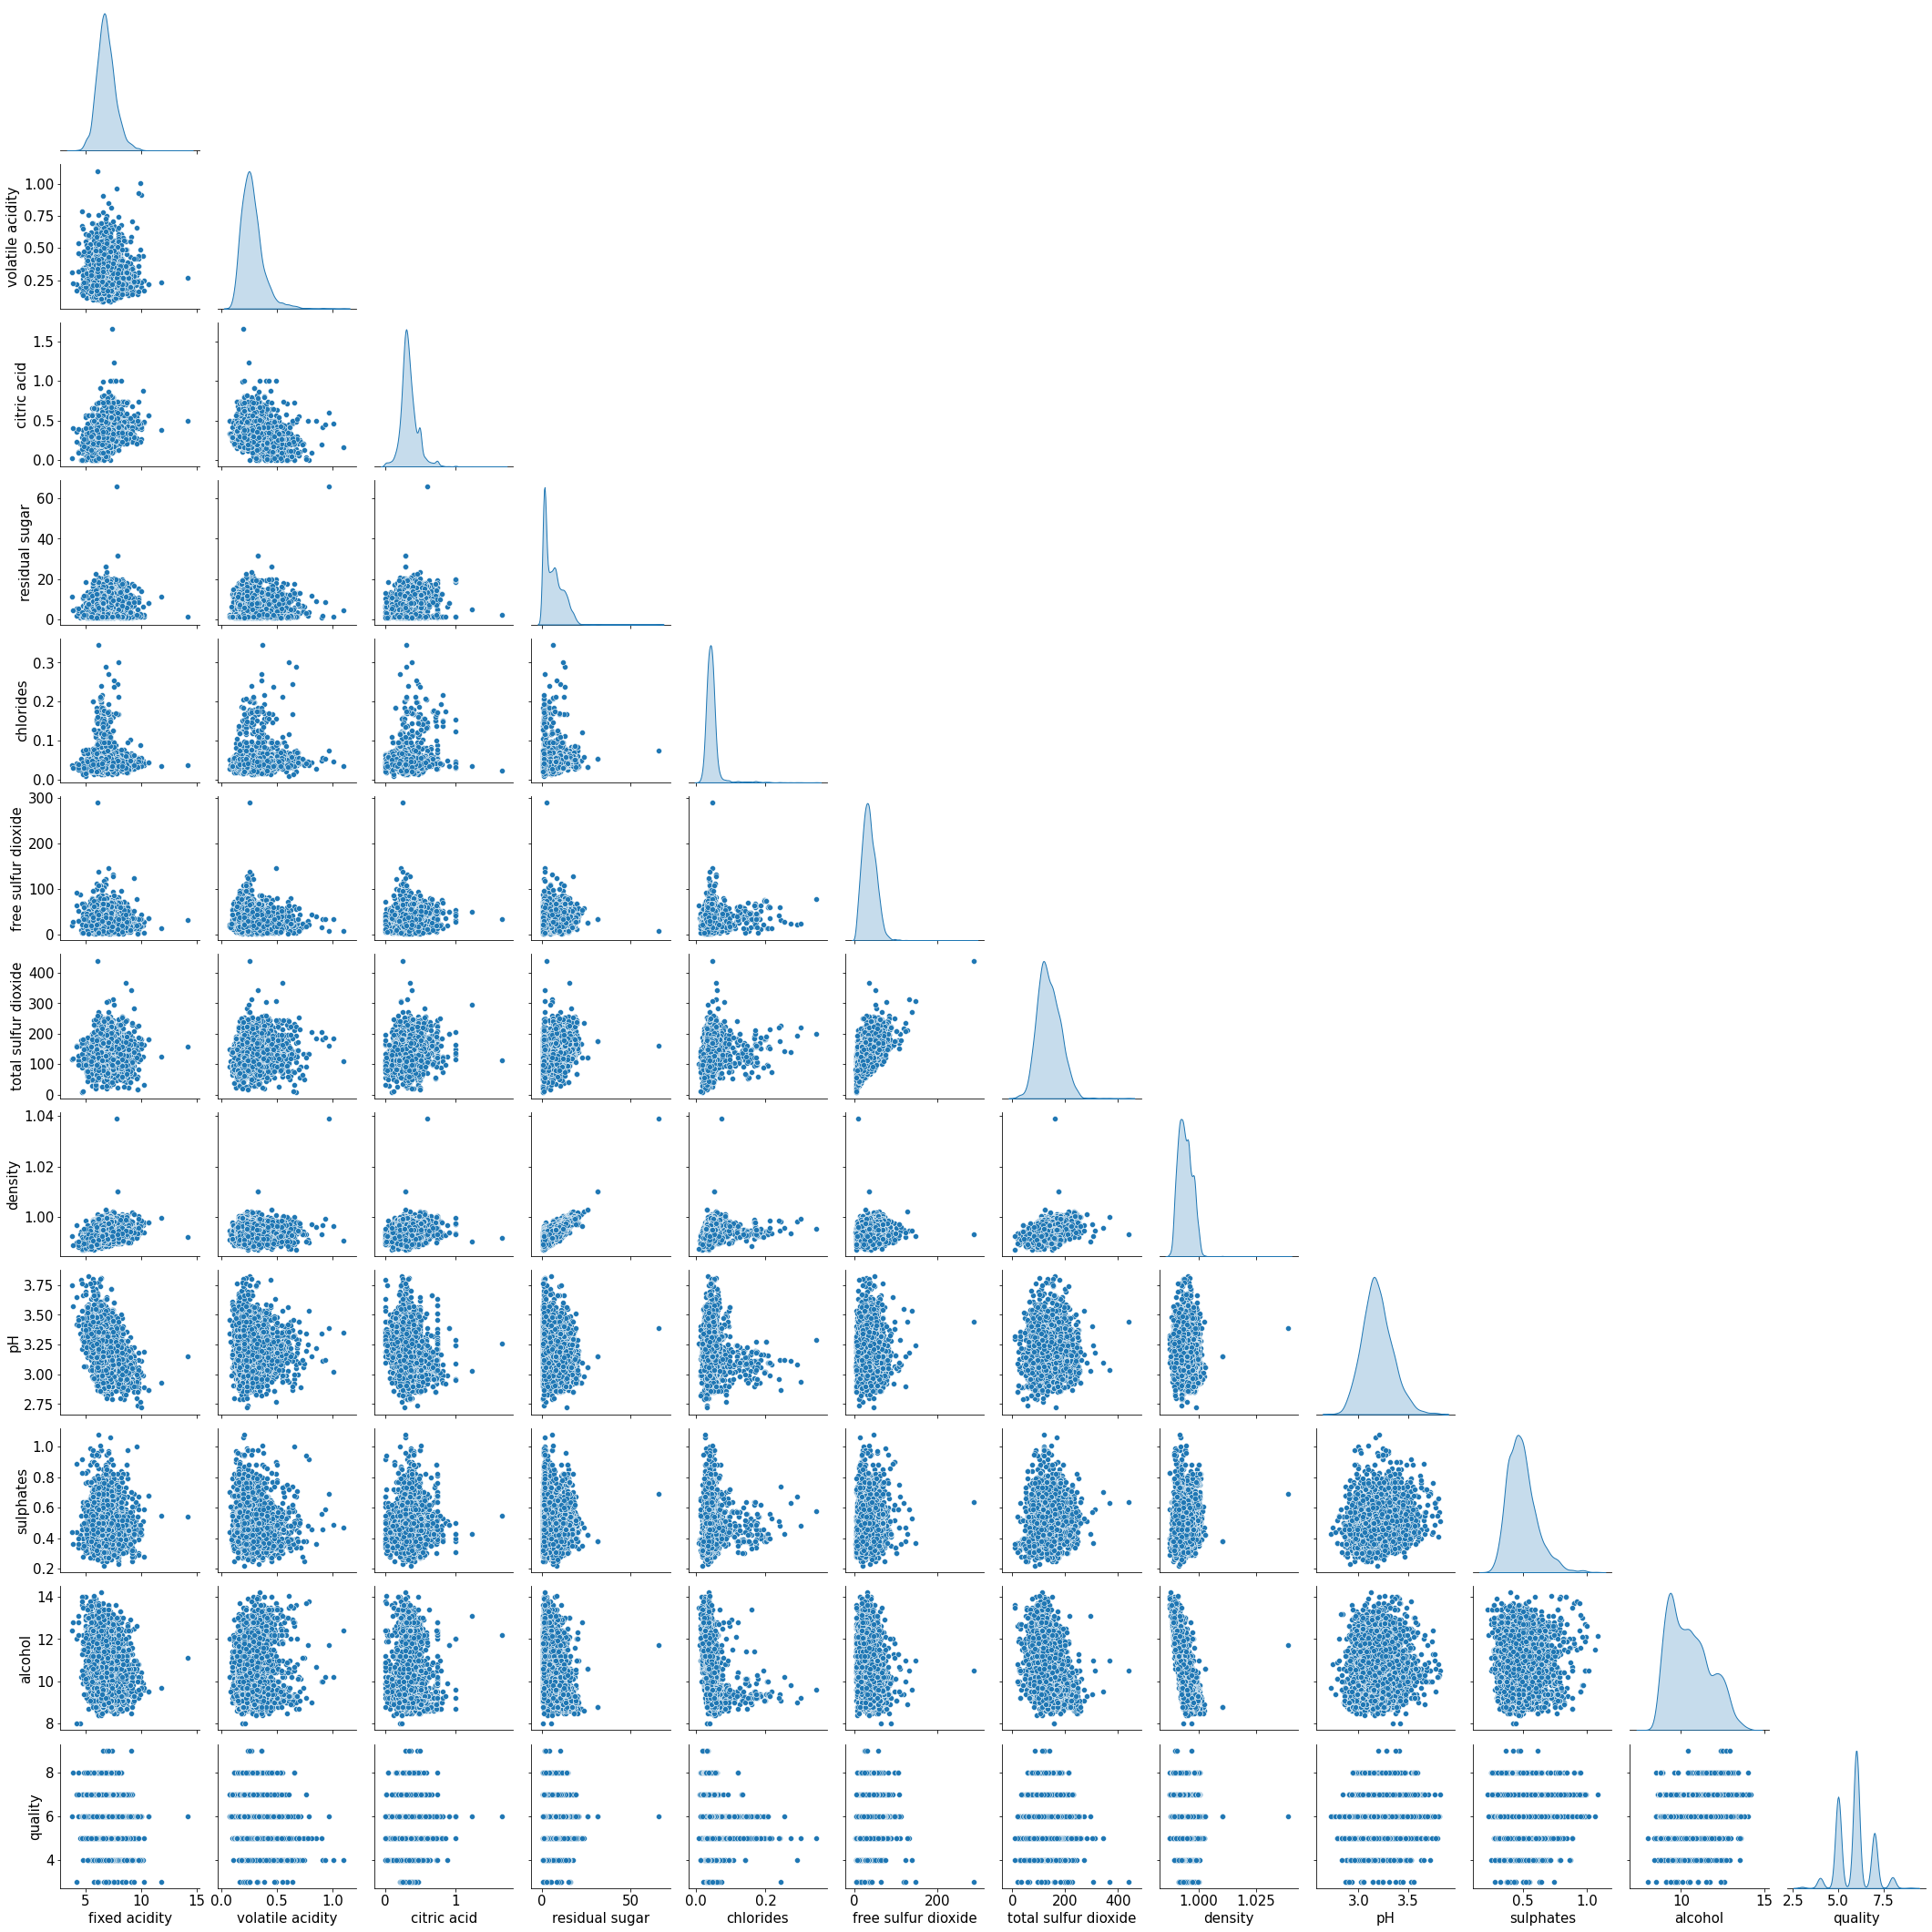

In [5]:
sns.pairplot(data_df, diag_kind='kde', corner=True) # hue='alcohol',

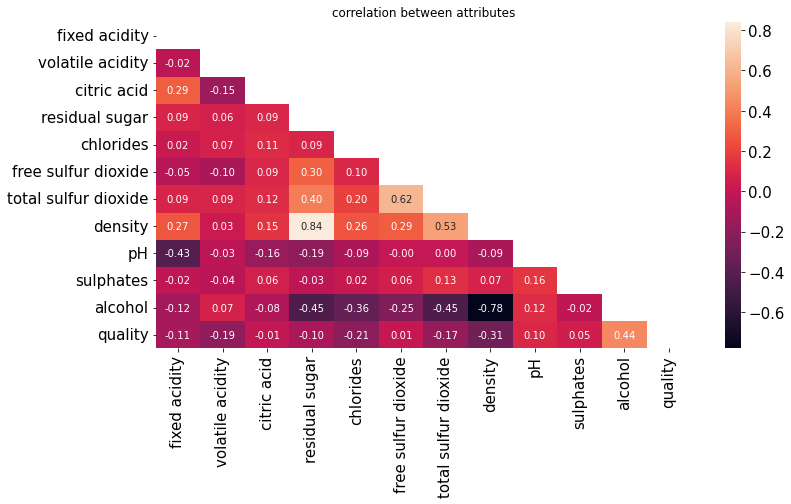

In [6]:
# plotting correlation heatmap
plt.figure(figsize=(12,6))
corr = data_df.corr()
mask = np.triu(corr)
sns.heatmap(corr, annot= True, mask= mask, fmt = '.2f')
plt.title("correlation between attributes")
plt.show()

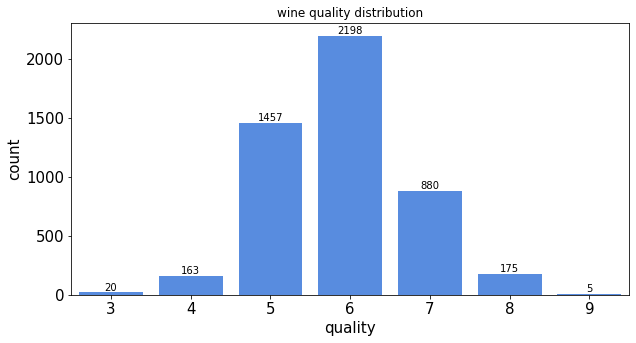

In [7]:
figure = plt.figure(figsize = (10,5))
ax = sns.countplot(x = "quality", data = data_df, color = '#4287f5')
plt.title("wine quality distribution")
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

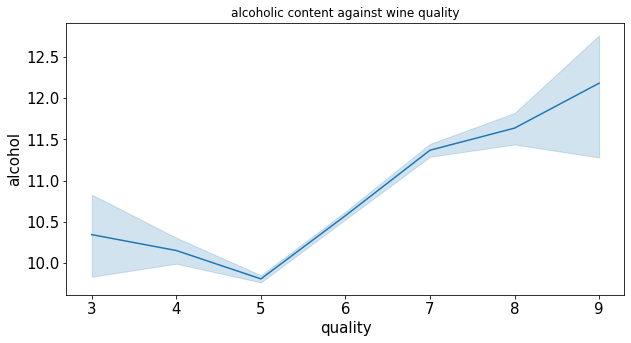

In [8]:
# plotting alcohol and quality
figure = plt.figure(figsize = (10,5))
ax = sns.lineplot(x = "quality", y = "alcohol", data = data_df)
plt.title("alcoholic content against wine quality")
plt.show()

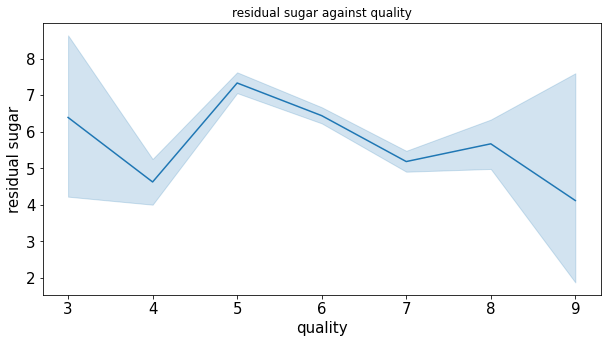

In [9]:
# plotting alcohol and residual sugar
figure = plt.figure(figsize = (10,5))
ax = sns.lineplot(x = "quality", y = "residual sugar", data = data_df)
plt.title("residual sugar against quality")
plt.show()

# Saperate X and y

In [10]:
X = data_df.drop('quality',axis=1) # Independet variable
y = data_df['quality'] # dependent variable

# Test Modules with different penalty

## Regression modules

In [12]:
models = [make_pipeline(StandardScaler(), SGDRegressor(penalty='l1', random_state=1)), 
              make_pipeline(StandardScaler(), SGDRegressor(penalty='l2', random_state=1)), 
              make_pipeline(StandardScaler(), SGDRegressor(penalty='elasticnet', random_state=1))]

for model in models:
    scores = cross_val_score(model, X, y, cv=15)
    print(f"{scores.mean():.3f} (+/- {scores.std():.3f})")
    #model.fit(X,y)
    #y_predict = model.predict(X)
    #mse = mean_squared_error(y_predict, y)
    #r2 = r2_score(y_predict, y)
    #print(mse, r2)
    

0.243 (+/- 0.109)
0.243 (+/- 0.108)
0.243 (+/- 0.109)


In [61]:
    #scores = cross_val_score(model, X, y, cv=10)
    #print(f"{scores.mean():.3f} (+/- {scores.std():.3f})")

In [14]:
def accuracy_score_regression(y_true, y_pred):
    return accuracy_score(y_true, y_pred.round())

accuracy_scorer = make_scorer(accuracy_score_regression)

## Classification modules

C:\Users\amiryo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=15.
  warnings.warn(


0.530 (+/- 0.048)
0.5408329930583912


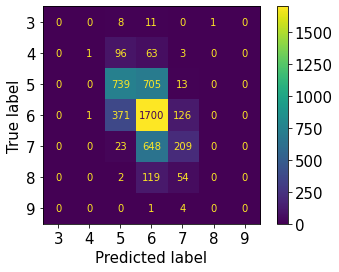

C:\Users\amiryo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=15.
  warnings.warn(


0.519 (+/- 0.039)
0.5226623111474071


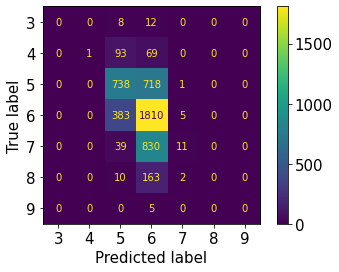

C:\Users\amiryo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=15.
  warnings.warn(


0.523 (+/- 0.044)
0.5234789710085749


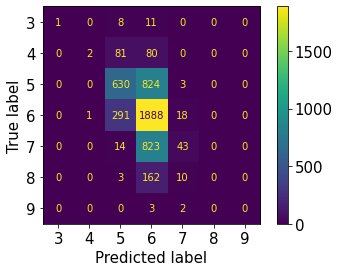

In [16]:
classifiers = [make_pipeline(StandardScaler(),
                             SGDClassifier(loss='log', alpha=0.001, learning_rate='constant', eta0=0.01, 
                                           penalty='l1')), 
              make_pipeline(StandardScaler(), 
                            SGDClassifier(loss='log', alpha=0.001, learning_rate='constant', eta0=0.01, 
                                          penalty='l2')), 
              make_pipeline(StandardScaler(), 
                            SGDClassifier(loss='log', alpha=0.001, learning_rate='constant', eta0=0.01, 
                                          penalty='elasticnet'))]

for classifier in classifiers:
    scores = cross_val_score(classifier, X, y, cv=15)#, scoring=accuracy_scorer)
    print(f"{scores.mean():.3f} (+/- {scores.std():.3f})")
    
    classifier.fit(X,y)
    
    y_pred = classifier.predict(X)
    
    print(classifier.score(X,y))
    
    cm = confusion_matrix(y, y_pred, labels=classifier.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
    disp.plot()
    plt.grid(False)
    plt.show()
    

## Use ordinal encoder
https://towardsdatascience.com/simple-trick-to-train-an-ordinal-regression-with-any-classifier-6911183d2a3c

In [14]:
from sklearn.base import clone
import numpy as np
# Source:
# 1. https://stackoverflow.com/questions/66486947/how-to-use-ordinal-classifier
# 2. https://towardsdatascience.com/simple-trick-to-train-an-ordinal-regression-with-any-classifier-6911183d2a3c


class OrdinalClassifier():

    def __init__(self, clf):
        self.clf = clf
        self.clfs = {}

    def fit(self, X, y):
        self.unique_class = np.sort(np.unique(y))
        if self.unique_class.shape[0] > 2:
            for i in range(self.unique_class.shape[0] - 1):
                # for each k - 1 ordinal value we fit a binary classification problem
                binary_y = (y > self.unique_class[i]).astype(np.uint8)
                clf = clone(self.clf)
                clf.fit(X, binary_y)
                self.clfs[i] = clf

    def predict_proba(self, X):
        clfs_predict = {k: v.predict_proba(X) for k, v in self.clfs.items()}
        predicted = []
        for i, y in enumerate(self.unique_class):
            if i == 0:
                # V1 = 1 - Pr(y > V1)
                predicted.append(1 - clfs_predict[i][:, 1])
            elif y in clfs_predict:
                # Vi = Pr(y > Vi-1) - Pr(y > Vi)
                predicted.append(clfs_predict[i - 1][:, 1] - clfs_predict[i][:, 1])
            else:
                # Vk = Pr(y > Vk-1)
                predicted.append(clfs_predict[i - 1][:, 1])
        return np.vstack(predicted).T

    def predict(self, X):
        return self.unique_class[np.argmax(self.predict_proba(X), axis=1)]

In [15]:
clf = make_pipeline(StandardScaler(), SGDClassifier(loss='log',alpha=0.001))
oc = OrdinalClassifier(clf)
oc.fit(X, y)
y_pred = oc.predict(X)
#print(oc.score(X,y))

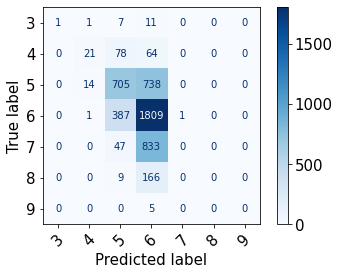

In [16]:
cm = confusion_matrix(y, y_pred, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.grid(False)
plt.show()

# GridSearchCV
Use Scikit-learn GridSearchCV, with the hyper parameters:  'penalty': ('l2', 'l1', 'elasticnet'), 'alpha':[0.0001, 0.001, 0.01, 0.1] to perform SGDClassifier on the data and print the accuracy score and the best parameters alpha and penalty.

You should see that the best parameters on this model (obtained with Grid Search), are penalty=elasticnet and alpha=0.001.



In [17]:
SGD = SGDClassifier(max_iter = 10000)
params = {'penalty':['l2', 'l1', 'elasticnet'],"alpha":[0.0001, 0.001, 0.01, 0.1]}

In [18]:
score=[]
model = GridSearchCV(SGD,params,cv=10,return_train_score=False)
model.fit(X,y)
score.append({
    "Model" : 'SGDClassifier',
    "Best_Score": model.best_score_,
    "Best_Params": model.best_params_
    })

C:\Users\amiryo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


In [19]:
score

[{'Model': 'SGDClassifier',
  'Best_Score': 0.438534284879596,
  'Best_Params': {'alpha': 0.0001, 'penalty': 'l1'}}]

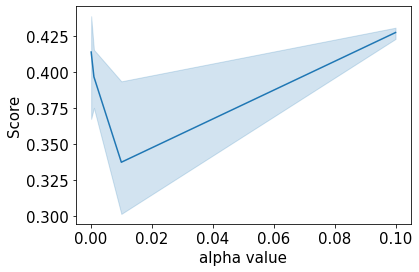

In [20]:
# Score versus alpha value
ax = sns.lineplot(x=model.cv_results_['param_alpha'] ,y=model.cv_results_['mean_test_score']);
ax.set(xlabel='alpha value', ylabel='Score')
plt.show()

0.5159248672927725


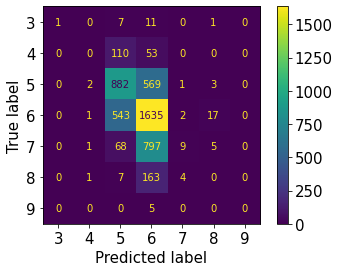

In [21]:
model = make_pipeline(StandardScaler(), SGDClassifier(alpha=0.001, penalty='elasticnet', max_iter = 10000))
model.fit(X,y)

y_pred = model.predict(X)
print(model.score(X,y))

cm = confusion_matrix(y, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.grid(False)
plt.show()

# RandomizedSearchCV
Now  try Scikit-learn RandomizedSearchCV.
Use Scipy stats.uniform to get uniformly randomize values of alpha.
Then use Numpy random.seed to make sure that you get the same result each time you run this cell.

You should get that the best parameters on this model (obtained with Random Search) were penalty=l2 and alpha=0.417022004702574.


In [22]:
# Create a dictionary of hyperparameters to randomly search
param_distributions = {'alpha': uniform(0, 1)}

# Create a RandomizedSearchCV object
np.random.seed(42)
random_search = RandomizedSearchCV(SGD, param_distributions, random_state=42)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X, y)

# Print the best combination of hyperparameters
print(random_search.best_params_)

{'alpha': 0.9507143064099162}


# Ensembles

Start with Scikit-learn BaggingClassifier.
It can be used with bootstrap=False for NFold bagging, or, with bootstrap=True for Bootstrap.
Try both options and print the accuracy score.

Which bagging got better results?

You should get that for our model, NFold Bagging got better results but the difference is small and it may change if we use bigger n_estimators.
Now try AdaBoosting, with AdaBoostClassifier

You should get that the bagging ensemble still performs best.


In [23]:
from sklearn.ensemble import BaggingClassifier

bagging_classifier = BaggingClassifier(base_estimator=SGD, bootstrap=False)
bagging_classifier.fit(X, y)
print(bagging_classifier.score(X,y))

0.48917925683952634


In [24]:
bagging_classifier = BaggingClassifier(base_estimator=SGD, bootstrap=True, n_estimators = 100)
bagging_classifier.fit(X, y)
print(bagging_classifier.score(X,y))

0.4797876684360964


In [25]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_classifier = AdaBoostClassifier(base_estimator=SGD, n_estimators=100, algorithm='SAMME')
adaboost_classifier.fit(X, y)
print(adaboost_classifier.score(X,y))

0.3666802776643528


In [26]:
# clone the lwlr repo from github
#!git clone https://github.com/qiaochen/CourseExercises

# K Nearest Neighbors (KNN)

In [27]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.metrics import accuracy_score

# Split the data into a training set and a test set using KFold
kf = KFold(n_splits=10)

# Create a list of values for K
k_values = range(1, 21)

# Initialize a list to store the accuracies for each value of K
accuracies = []

# Loop through the values of K
for k in k_values:
    # Create a KNeighborsClassifier object with k neighbors
    model = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model and make predictions on the test set
    scores = cross_val_score(model, X, y, cv=kf)
    
    # Calculate the mean accuracy score
    mean_accuracy = scores.mean()
    
    # Append the mean accuracy to the list of accuracies
    accuracies.append(mean_accuracy)

# Find the value of K that gives the highest accuracy
best_k = k_values[accuracies.index(max(accuracies))]

# Print the best value of K
print("Best value of K:", best_k)

Best value of K: 20


In [28]:
from sklearn.neighbors import KNeighborsRegressor

# Split the data into a training set and a test set using KFold
kf = KFold(n_splits=10)

# Create a list of values for K
k_values = range(1, 21)

# Initialize a list to store the accuracies for each value of K
accuracies = []

# Loop through the values of K
for k in k_values:
    # Create a KNeighborsClassifier object with k neighbors
    model = KNeighborsRegressor(n_neighbors=k)
    
    # Train the model and make predictions on the test set
    scores = cross_val_score(model, X, y, cv=kf)
    
    # Calculate the mean accuracy score
    mean_accuracy = scores.mean()
    
    # Append the mean accuracy to the list of accuracies
    accuracies.append(mean_accuracy)

# Find the value of K that gives the highest accuracy
best_k = k_values[accuracies.index(max(accuracies))]

# Print the best value of K
print("Best value of K:", best_k)

Best value of K: 20


In [29]:
accuracies

[-0.5399939314925966,
 -0.2499194135672429,
 -0.12388885095506978,
 -0.06302505387090289,
 -0.02005812774383554,
 -0.0006356451099518212,
 0.006432865426643097,
 0.021144206744149675,
 0.03537243202339376,
 0.046490920520012156,
 0.05748034320557495,
 0.060800715113061274,
 0.05932837782095237,
 0.06294965282538646,
 0.06747176032769979,
 0.07039125864840386,
 0.07559494404001703,
 0.07945475525306989,
 0.082615059915387,
 0.08326217102221242]

# From Kaggle

### https://www.kaggle.com/code/taha07/wine-quality-prediction-data-analysis   

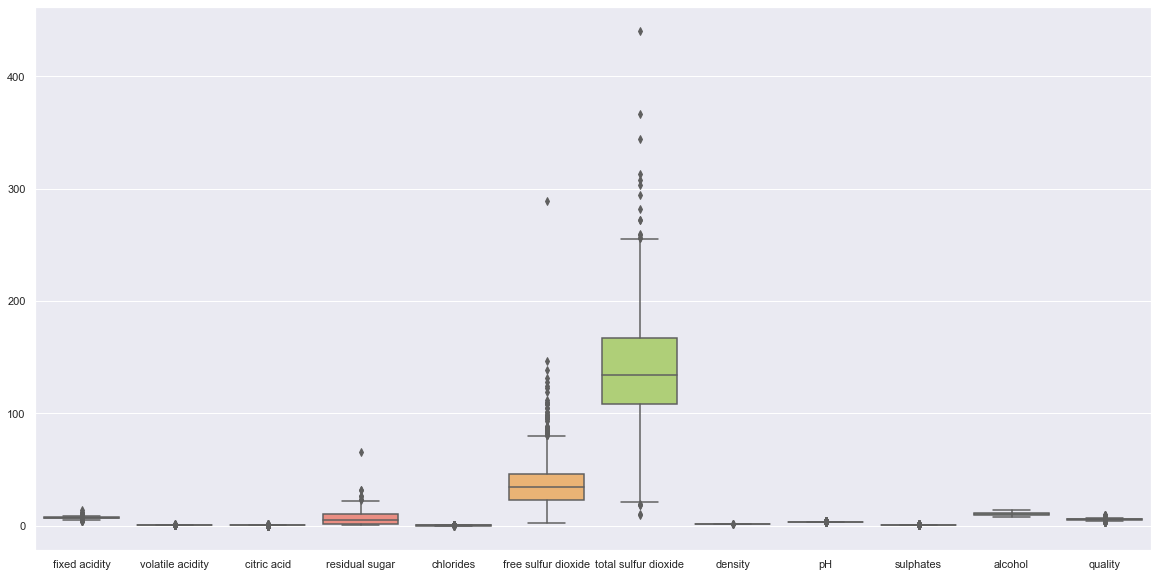

In [30]:
sns.set()
plt.figure(figsize=(20,10))
sns.boxplot(data=data_df,palette="Set3")
plt.show()

In [31]:
lower_limit = data_df["free sulfur dioxide"].mean() - 3*data_df["free sulfur dioxide"].std()
upper_limit = data_df["free sulfur dioxide"].mean() + 3*data_df["free sulfur dioxide"].std()
#print(lower_limit,upper_limit)
df2 = data_df[(data_df["free sulfur dioxide"] > lower_limit) & (data_df["free sulfur dioxide"] < upper_limit)]

In [32]:
lower_limit = df2['total sulfur dioxide'].mean() - 3*df2['total sulfur dioxide'].std()
upper_limit = df2['total sulfur dioxide'].mean() + 3*df2['total sulfur dioxide'].std()
df3 = df2[(df2['total sulfur dioxide'] > lower_limit) & (df2['total sulfur dioxide'] < upper_limit)]

In [33]:
lower_limit = df3['residual sugar'].mean() - 3*df3['residual sugar'].std()
upper_limit = df3['residual sugar'].mean() + 3*df3['residual sugar'].std()
df4 = df3[(df3['residual sugar'] > lower_limit) & (df3['residual sugar'] < upper_limit)]

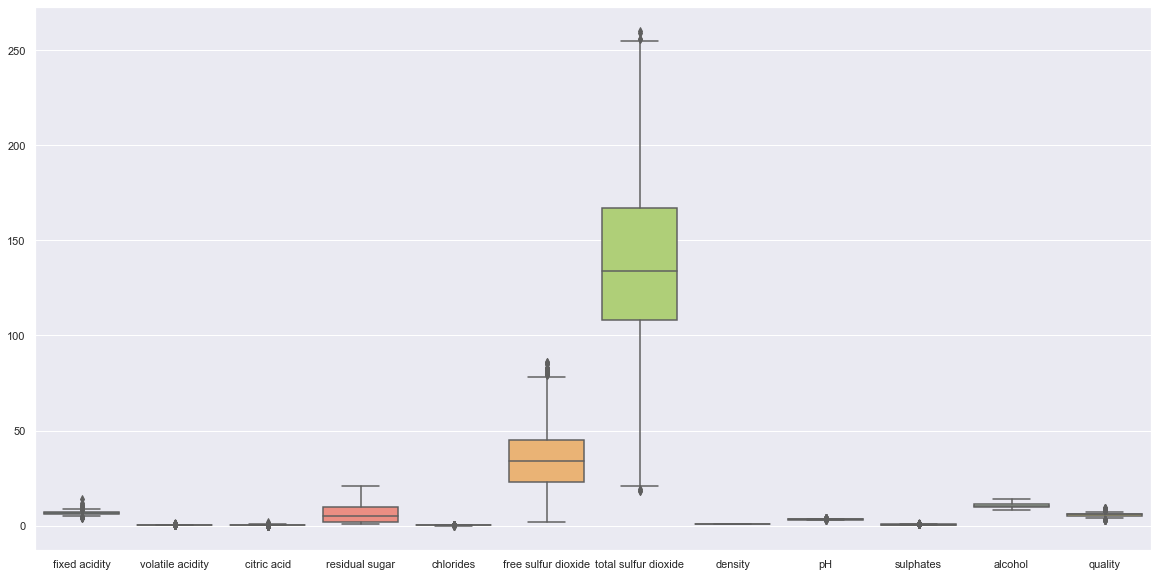

In [34]:
sns.set()
plt.figure(figsize=(20,10))
sns.boxplot(data=df4,palette="Set3")
plt.show()

In [35]:
quaity_mapping = { 3 : "Low",4 : "Low",5: "Medium",6 : "Medium",7: "Medium",8 : "High",9 : "High"}
df4["quality"] =  df4["quality"].map(quaity_mapping)

C:\Users\amiryo\AppData\Local\Temp\ipykernel_17228\2777274326.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4["quality"] =  df4["quality"].map(quaity_mapping)


In [36]:
df4.quality.value_counts()

Medium    4498
High       176
Low        175
Name: quality, dtype: int64

In [37]:
mapping_quality = {"Low" : 0,"Medium": 1,"High" : 2}
df4["quality"] =  df4["quality"].map(mapping_quality)

C:\Users\amiryo\AppData\Local\Temp\ipykernel_17228\2585505916.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4["quality"] =  df4["quality"].map(mapping_quality)


In [38]:
X = df4.drop('quality',axis=1) # Independet variable
y = df4['quality'] # dependent variable

<AxesSubplot:>

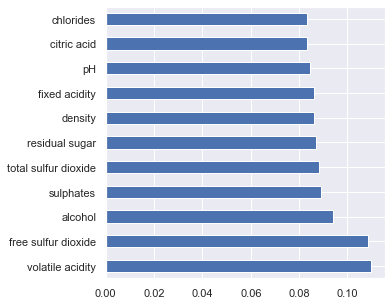

In [39]:
model = ExtraTreesClassifier()
model.fit(X,y)
plt.figure(figsize=(5, 5))
feature_rank = pd.Series(model.feature_importances_, index = X.columns)
feature_rank.nlargest(95).plot(kind = "barh")

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [41]:
model_params  = {
    "svm" : {
        "model":SVC(gamma="auto"),
        "params":{
            'C' : [1,10,20],
            'kernel':["rbf"]
        }
    },
    
    "decision_tree":{
        "model": DecisionTreeClassifier(),
        "params":{
            'criterion':["entropy","gini"],
            "max_depth":[5,8,9]
        }
    },
    
    "random_forest":{
        "model": RandomForestClassifier(),
        "params":{
            "n_estimators":[1,5,10],
            "max_depth":[5,8,9]
        }
    },
    "naive_bayes":{
        "model": GaussianNB(),
        "params":{}
    },
    
    'logistic_regression' : {
        'model' : LogisticRegression(solver='liblinear',multi_class = 'auto'),
        'params': {
            "C" : [1,5,10]
        }
    }
    
}

In [42]:
score=[]
for model_name,mp in model_params.items():
    clf = GridSearchCV(mp["model"],mp["params"],cv=8,return_train_score=False)
    clf.fit(X,y)
    score.append({
        "Model" : model_name,
        "Best_Score": clf.best_score_,
        "Best_Params": clf.best_params_
    })

In [43]:
df5 = pd.DataFrame(score,columns=["Model","Best_Score","Best_Params"])

In [44]:
df5

,Model,Best_Score,Best_Params
0,svm,0.926789,"{'C': 1, 'kernel': 'rbf'}"
1,decision_tree,0.919985,"{'criterion': 'entropy', 'max_depth': 5}"
2,random_forest,0.927408,"{'max_depth': 5, 'n_estimators': 10}"
3,naive_bayes,0.859345,{}
4,logistic_regression,0.928233,{'C': 5}


0.9282326252835637


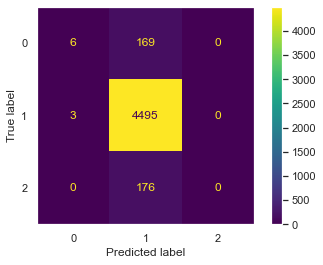

In [45]:
model = make_pipeline(StandardScaler(),
              SGDClassifier(loss='log', alpha=0, learning_rate='constant', eta0=0.01, 
                            penalty='elasticnet'))
model.fit(X,y)
y_pred = model.predict(X)
print(model.score(X,y))
cm = confusion_matrix(y, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.grid(False)
plt.show()

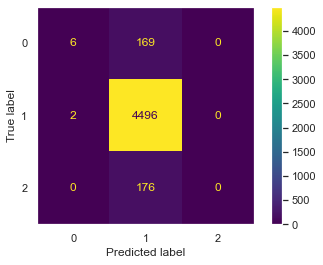

In [46]:
clf = make_pipeline(StandardScaler(),
              SGDClassifier(loss='log', alpha=0, learning_rate='constant', eta0=0.01, 
                            penalty='elasticnet'))

model = OrdinalClassifier(clf)

model.fit(X,y)
y_pred = model.predict(X)
#print(model.score(X,y))
cm = confusion_matrix(y, y_pred)#, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)#, display_labels=model.classes_)
disp.plot()
plt.grid(False)
plt.show()